# Employee Number Change

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/employee_retention_clean.csv')

In [2]:
df_employee = df[['TanggalHiring', 'TanggalResign']].copy()
df_employee

,TanggalHiring,TanggalResign
0,2011-01-10,NaN
1,2014-01-06,2018-06-16
2,2011-01-10,2014-09-24
3,2014-02-17,NaN
4,2013-11-11,2018-09-06
...,...,...
282,2011-09-26,NaN
283,2013-05-13,2017-11-15
284,2013-11-11,2018-06-08
285,2011-05-16,2018-04-01


In [3]:
#Memisahkan Tahun

df_employee['TanggalHiring'] = pd.to_datetime(df_employee['TanggalHiring'])
df_employee['TanggalResign'] = pd.to_datetime(df_employee['TanggalResign'])

df_employee['TahunHiring'] = df_employee['TanggalHiring'].dt.year
df_employee['TahunResign'] = df_employee['TanggalResign'].dt.year

In [4]:
#Jumlah Hiring per Tahun

hiring_grouped = df_employee.groupby('TahunHiring').agg({'TahunHiring':'count'})
hiring_grouped.columns = (['TotalHiring'])
hiring_grouped.reset_index(inplace=True)
hiring_grouped

,TahunHiring,TotalHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [5]:
#Jumlah Resign per Tahun

resign_grouped = df_employee.groupby('TahunResign').agg({'TahunResign':'count'})
resign_grouped.columns = (['TotalResign'])
resign_grouped.reset_index(inplace=True)
resign_grouped

,TahunResign,TotalResign
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [6]:
# Merge Hiring dan Resign dataset

employee_group = hiring_grouped.merge(resign_grouped,
                                     left_on = 'TahunHiring',
                                     right_on = 'TahunResign',
                                     how = 'outer')
employee_group

,TahunHiring,TotalHiring,TahunResign,TotalResign
0,2006.0,1.0,NaN,NaN
1,2007.0,2.0,NaN,NaN
2,2008.0,2.0,NaN,NaN
3,2009.0,7.0,NaN,NaN
4,2010.0,8.0,NaN,NaN
5,2011.0,76.0,NaN,NaN
6,2012.0,41.0,NaN,NaN
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,31.0,2015.0,8.0


In [7]:
# Membersihkan Null Value
employee_group['TahunHiring'][13] = 2019
employee_group['TahunHiring'][14] = 2020

employee_group['TotalHiring'].fillna(0,inplace=True)
employee_group['TotalResign'].fillna(0,inplace=True)

employee_group.drop('TahunResign',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
# Mengekstrak kolom baru

employee_group['PerubahanKaryawan'] = employee_group['TotalHiring'] - employee_group['TotalResign']
employee_group['TotalKaryawan'] = employee_group.PerubahanKaryawan.cumsum()

employee_group['PersentasePerubahan'] = (employee_group['TotalKaryawan'].pct_change()) * (100)
employee_group['PersentasePerubahan'].fillna(0,inplace=True)
employee_group['PersentasePerubahan']= employee_group['PersentasePerubahan'].astype(int).astype(str) + '%'

employee_group

,TahunHiring,TotalHiring,TotalResign,PerubahanKaryawan,TotalKaryawan,PersentasePerubahan
0,2006.0,1.0,0.0,1.0,1.0,0%
1,2007.0,2.0,0.0,2.0,3.0,200%
2,2008.0,2.0,0.0,2.0,5.0,66%
3,2009.0,7.0,0.0,7.0,12.0,140%
4,2010.0,8.0,0.0,8.0,20.0,66%
5,2011.0,76.0,0.0,76.0,96.0,380%
6,2012.0,41.0,0.0,41.0,137.0,42%
7,2013.0,43.0,5.0,38.0,175.0,27%
8,2014.0,56.0,12.0,44.0,219.0,25%
9,2015.0,31.0,8.0,23.0,242.0,10%


In [9]:
# Visualisasi Menggunakan Waterfall Plot
import plotly.graph_objects as go
fig2 = go.Figure(go.Waterfall(
    name = "Total Employee", orientation = "v", 
    x = employee_group.TahunHiring,
    text = employee_group.PersentasePerubahan,
    y = employee_group.PerubahanKaryawan,
    connector = {"line":{"color":"#bbbbbb"}},
    increasing = {"marker":{"color":"#f9e500"}},
    decreasing = {"marker":{"color":"#5e5e5e"}},
))
fig2


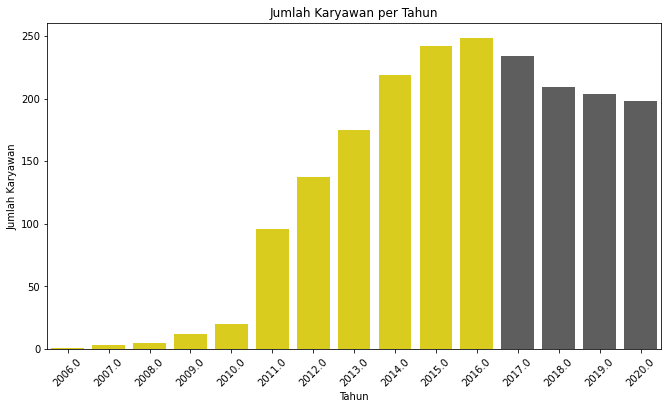

In [10]:
#Visualisasi menggunakan barplot

pal = ["#f9e500","#f9e500","#f9e500","#f9e500","#f9e500",
       "#f9e500","#f9e500","#f9e500","#f9e500","#f9e500",
       "#f9e500","#5e5e5e","#5e5e5e","#5e5e5e","#5e5e5e"]
plt.figure(figsize=(11,6))
sns.barplot(data = employee_group, x='TahunHiring', y='TotalKaryawan', palette=pal)
plt.title('Jumlah Karyawan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45)
plt.show()